Лабораторная 2

Информация об экономике стран

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv(".//static//scv//Economic Data - 9 Countries (1980-2020).csv")
print(df.columns)

Index(['stock index', 'country', 'year', 'index price', 'log_indexprice',
       'inflationrate', 'oil prices', 'exchange_rate', 'gdppercent',
       'percapitaincome', 'unemploymentrate', 'manufacturingoutput',
       'tradebalance', 'USTreasury'],
      dtype='object')


Столбцы на русском:
'stock index' - индекс акций
'country' - страна
'year'- год
'index price' - индекс стоимости
'log_indexprice' - индексная цена журнала
'inflationrate' - ставка инфляции
'oil prices' - цена на нефть
'exchange_rate' - ставка обмена
'gdppercent' - процент ВВП
'percapitaincome' - доход на душу населения
'unemploymentrate' - уровень безработицы
'manufacturingoutput' - объем производства
'tradebalance' - торговый баланс
'USTreasury' - UST казначейство

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   index price          317 non-null    float64
 4   log_indexprice       369 non-null    float64
 5   inflationrate        326 non-null    float64
 6   oil prices           369 non-null    float64
 7   exchange_rate        367 non-null    float64
 8   gdppercent           350 non-null    float64
 9   percapitaincome      368 non-null    float64
 10  unemploymentrate     348 non-null    float64
 11  manufacturingoutput  278 non-null    float64
 12  tradebalance         365 non-null    float64
 13  USTreasury           369 non-null    float64
dtypes: float64(12), object(2)
memory usage: 40.5+ KB


stock index                   country    year  index price  log_indexprice  \
0      NASDAQ  United States of America  1980.0       168.61            2.23   
1      NASDAQ  United States of America  1981.0       203.15            2.31   
2      NASDAQ  United States of America  1982.0       188.98            2.28   
3      NASDAQ  United States of America  1983.0       285.43            2.46   
4      NASDAQ  United States of America  1984.0       248.89            2.40   

   inflationrate  oil prices  exchange_rate  gdppercent  percapitaincome  \
0           0.14       21.59            1.0        0.09          12575.0   
1           0.10       31.77            1.0        0.12          13976.0   
2           0.06       28.52            1.0        0.04          14434.0   
3           0.03       26.19            1.0        0.09          15544.0   
4           0.04       25.88            1.0        0.11          17121.0   

   unemploymentrate  manufacturingoutput  tradebalance  USTreasury  
0              0.07                  NaN        -13.06        0.11  
1              0.08                  NaN        -12.52        0.14  
2              0.10                  NaN        -19.97        0.13  
3              0.10                  NaN        -51.64        0.11  
4              0.08                  NaN       -102.73        0.12

Объект наблюдения - экономика
Атрибуты - содержит набор информации об обучении, такие как:
Фондовый рынок, ВВП, страна, год, стоимость топлива, уровень инфлции,уровень безработицы и так далее

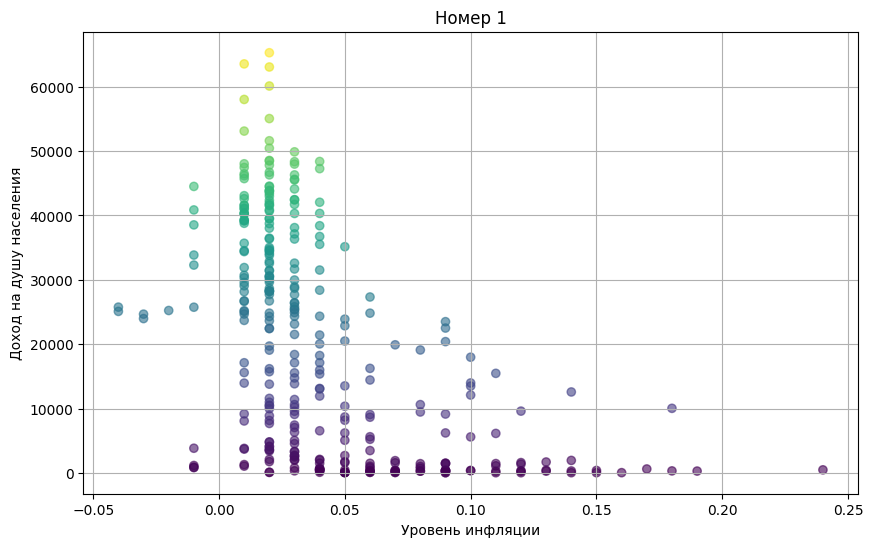

In [4]:
plt.figure(figsize=(10, 6))

plt.scatter(df['inflationrate'], df['percapitaincome'], c=df['percapitaincome'], alpha=0.6)

plt.title("Номер 1")
plt.ylabel("Доход на душу населения")
plt.xlabel("Уровень инфляции")
plt.grid(visible='true')

plt.show()

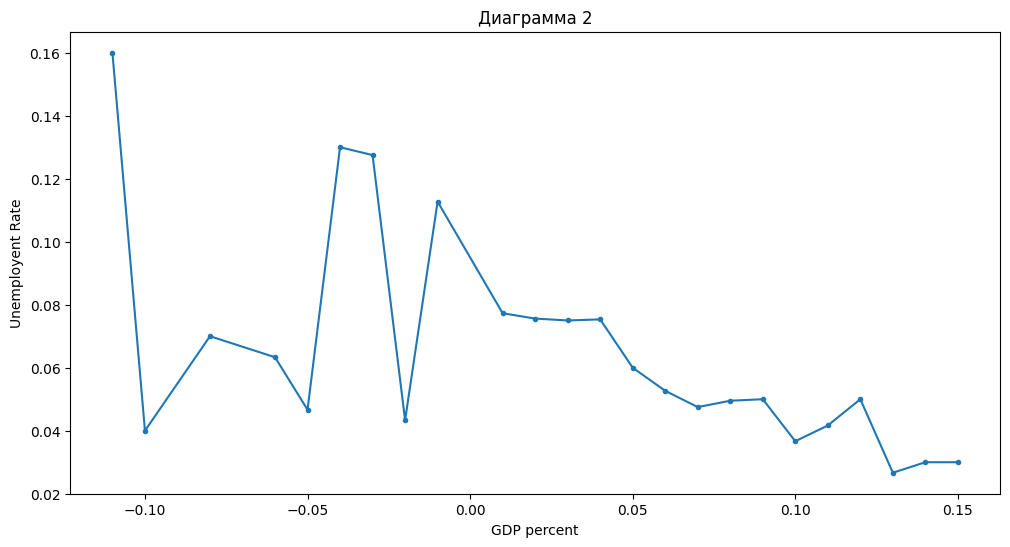

In [5]:
year_condition = df.groupby('gdppercent')['unemploymentrate'].mean().reset_index()

plt.figure(figsize=(12, 6))

plt.plot(year_condition['gdppercent'], year_condition['unemploymentrate'], marker='.')

plt.title("Диаграмма 2")
plt.xlabel("GDP percent")
plt.ylabel("Unemployent Rate")


plt.show()

Присутствует связь между атрибутами, уровень инфляции влияет и зависит от многих атрибутов.
Для примера на графике приведена связь между инфляцией и доходом на душу населения. На втором графике показана связь уровня ВВП и безработицы
Примеры бизнес целей

    1.Прогнозирование уровня инфляции на основе уровня ВВП.
    2.Наблюдение за изменениями уровня безработицы с уровнем ВВП.
    
Эффект для бизнеса: влияние на инвестиции индекса акций и цен на нефть, исследование влияния фондового индекса на инвестиции, исследования инфляции и покупательской способности.
Цели технического проекта

Для первой цели:

Вход: Доход на душу населения
Целевой признак: Уровень инфляции.

Для второй цели:

Вход: Уровень безработицы
Целевой признак: Уровень ВВП

Проверка на выбросы

In [6]:
null_values = df.isnull().sum()
print("Пропущенные значения по столбцам:")
print(null_values)

stat_summary = df.describe()
print("\nСтатистический обзор данных:")
print(stat_summary)


Пропущенные значения по столбцам:
stock index             0
country                 0
year                    0
index price            52
log_indexprice          0
inflationrate          43
oil prices              0
exchange_rate           2
gdppercent             19
percapitaincome         1
unemploymentrate       21
manufacturingoutput    91
tradebalance            4
USTreasury              0
dtype: int64

Статистический обзор данных:
              year   index price  log_indexprice  inflationrate  oil prices  \
count   369.000000    317.000000      369.000000     326.000000  369.000000   
mean   2000.000000   7898.648297        3.610542       0.041748   39.743171   
std      11.848225   7811.336862        0.482481       0.039579   25.452654   
min    1980.000000    168.610000        2.230000      -0.040000   11.350000   
25%    1990.000000   2407.100000        3.320000       0.020000   19.410000   
50%    2000.000000   5160.100000        3.600000       0.030000   28.520000   
75%   

На основе данных выше можно выделить большое количество столбцов с пропущенными значениями
Также проверим данные на выбросы и дубликаты:

In [7]:
for column in df.select_dtypes(include=[np.number]).columns:
    skewness = df[column].skew()
    print(f"\nКоэффициент асимметрии для столбца '{column}': {skewness}")

duplicates = df.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")



Коэффициент асимметрии для столбца 'year': 0.0

Коэффициент асимметрии для столбца 'index price': 1.7605604508668822

Коэффициент асимметрии для столбца 'log_indexprice': -0.23716751168770417

Коэффициент асимметрии для столбца 'inflationrate': 1.5616085380027898

Коэффициент асимметрии для столбца 'oil prices': 0.9915046764713877

Коэффициент асимметрии для столбца 'exchange_rate': 2.1575952097650455

Коэффициент асимметрии для столбца 'gdppercent': -0.038272329611460466

Коэффициент асимметрии для столбца 'percapitaincome': 0.3051430219264069

Коэффициент асимметрии для столбца 'unemploymentrate': 1.8092896369785585

Коэффициент асимметрии для столбца 'manufacturingoutput': 4.195480293406057

Коэффициент асимметрии для столбца 'tradebalance': -2.266183907194849

Коэффициент асимметрии для столбца 'USTreasury': 0.6687596580836408

Количество дубликатов: 0


На основе данных выше можно сказать, что для столбца объем производства присутствует выброс.
Удаляем все найденные пустые значения.

In [8]:
def drop_missing_values(dataframe, name):
    before_shape = dataframe.shape 
    cleaned_dataframe = dataframe.dropna()  
    after_shape = cleaned_dataframe.shape 
    print(f"В наборе данных '{name}' было удалено {before_shape[0] - after_shape[0]} строк с пустыми значениями.")
    return cleaned_dataframe

cleaned_df = drop_missing_values(df, "Economic")

В наборе данных 'Economic' было удалено 150 строк с пустыми значениями.


Очистка данных от шумов:

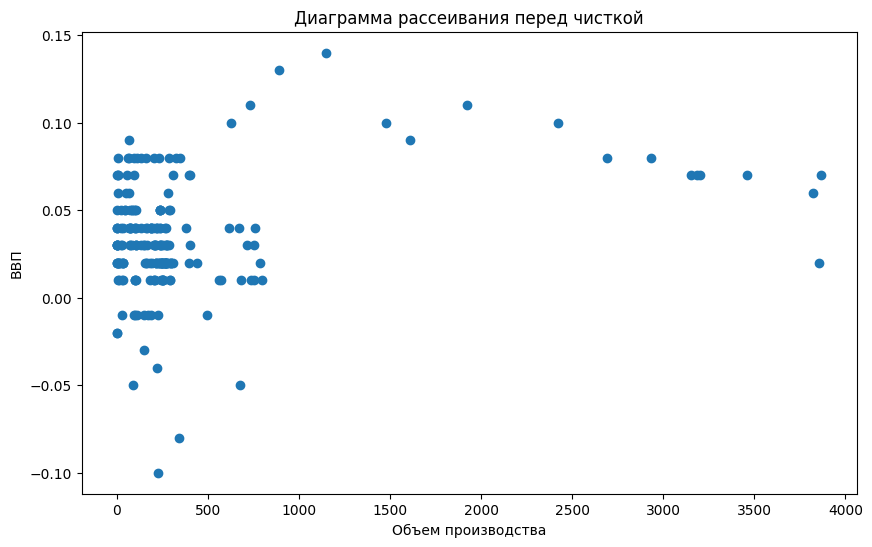

Выбросы в датасете:
    stock index  country    year  index price  log_indexprice  inflationrate  \
229      SZCOMP    China  2004.0      1467.57            3.17           0.04   
230      SZCOMP    China  2005.0      1144.54            3.06           0.02   
231      SZCOMP    China  2006.0      1687.14            3.23           0.02   
232      SZCOMP    China  2007.0      4329.44            3.64           0.05   
233      SZCOMP    China  2008.0      2912.90            3.46           0.06   
234      SZCOMP    China  2009.0      2737.01            3.44          -0.01   
235      SZCOMP    China  2010.0      2795.88            3.45           0.03   
236      SZCOMP    China  2011.0      2639.19            3.42           0.06   
237      SZCOMP    China  2012.0      2211.11            3.34           0.03   
238      SZCOMP    China  2013.0      2182.52            3.34           0.03   
239      SZCOMP    China  2014.0      2279.75            3.36           0.02   
240      SZCOMP    C

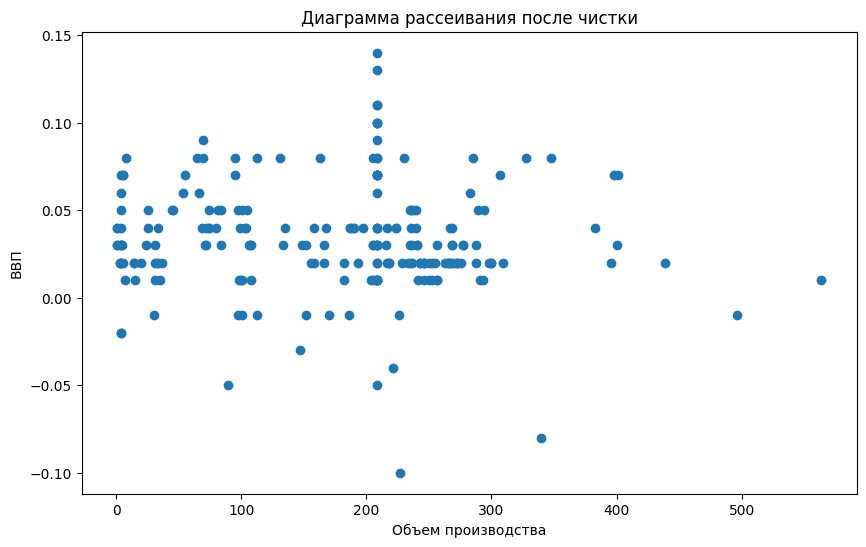

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['manufacturingoutput'], cleaned_df['gdppercent'])
plt.xlabel('Объем производства')
plt.ylabel('ВВП')
plt.title('Диаграмма рассеивания перед чисткой')
plt.show()

Q1 = cleaned_df["manufacturingoutput"].quantile(0.25)
Q3 = cleaned_df["manufacturingoutput"].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5 * IQR
lower_bound = Q1 - threshold
upper_bound = Q3 + threshold

outliers = (cleaned_df["manufacturingoutput"] < lower_bound) | (cleaned_df["manufacturingoutput"] > upper_bound)

# Вывод выбросов
print("Выбросы в датасете:")
print(cleaned_df[outliers])

# Заменяем выбросы на медианные значения
median_score = cleaned_df["manufacturingoutput"].median()
cleaned_df.loc[outliers, "manufacturingoutput"] = median_score

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['manufacturingoutput'], cleaned_df['gdppercent'])
plt.xlabel('Объем производства')
plt.ylabel('ВВП')
plt.title('Диаграмма рассеивания после чистки')
plt.show()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [10]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(cleaned_df, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 131
Размер контрольной выборки: 44
Размер тестовой выборки: 44


Видим недостаток баланса

In [11]:
def check_balance(df, name):
    counts = df['gdppercent'].value_counts()
    print(f"Распределение ВВП в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение ВВП в обучающей выборке:
gdppercent
 0.02    30
 0.04    25
 0.03    21
 0.01    13
 0.07     8
 0.08     8
 0.05     7
-0.01     5
 0.11     2
 0.09     2
-0.02     2
 0.10     2
-0.03     1
 0.14     1
-0.10     1
 0.06     1
-0.05     1
-0.04     1
Name: count, dtype: int64

Распределение ВВП в контрольной выборке:
gdppercent
 0.02    9
 0.03    7
 0.01    6
 0.07    4
 0.04    4
 0.05    4
 0.08    3
 0.06    3
-0.01    2
 0.10    1
-0.08    1
Name: count, dtype: int64

Распределение ВВП в тестовой выборке:
gdppercent
 0.02    12
 0.03     8
 0.01     7
 0.05     5
 0.04     3
 0.08     3
-0.01     2
-0.05     1
 0.06     1
 0.13     1
 0.07     1
Name: count, dtype: int64



также используем oversampling и undersampling

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def binning(target, bins):
    return pd.cut(target, bins=bins, labels=False)

train_df['gdppercent_binned'] = binning(train_df['gdppercent'], bins=3)
val_df['gdppercent_binned'] = binning(val_df['gdppercent'], bins=3)
test_df['gdppercent_binned'] = binning(test_df['gdppercent'], bins=3)

def oversample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    oversampler = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = oversampler.fit_resample(X, y) # type: ignore
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1) 
    return resampled_df

def undersample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    undersampler = RandomUnderSampler(random_state=42)
    x_resampled, y_resampled = undersampler.fit_resample(X, y) # type: ignore
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df, 'gdppercent_binned')
val_df_oversampled = oversample(val_df, 'gdppercent_binned')
test_df_oversampled = oversample(test_df, 'gdppercent_binned')

train_df_undersampled = undersample(train_df, 'gdppercent_binned')
val_df_undersampled = undersample(val_df, 'gdppercent_binned')
test_df_undersampled = undersample(test_df, 'gdppercent_binned')

print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение ВВП в обучающей выборке:
gdppercent
 0.08    37
 0.07    33
-0.04    31
 0.02    30
-0.10    27
 0.04    25
-0.05    25
-0.03    21
 0.03    21
 0.01    13
 0.11    11
 0.09    11
 0.10     7
 0.05     7
-0.01     5
 0.14     5
-0.02     2
 0.06     1
Name: count, dtype: int64

Распределение ВВП в контрольной выборке:
gdppercent
-0.08    24
 0.02     9
 0.07     7
 0.03     7
 0.01     6
 0.05     5
 0.04     4
 0.06     4
 0.08     3
-0.01     2
 0.10     1
Name: count, dtype: int64

Распределение ВВП в тестовой выборке:
gdppercent
 0.08    26
-0.01    22
-0.05    14
 0.02    12
 0.03     8
 0.01     7
 0.05     5
 0.07     5
 0.13     5
 0.04     3
 0.06     1
Name: count, dtype: int64

Андерсэмплинг:
Распределение ВВП в обучающей выборке:
gdppercent
 0.01    2
 0.08    2
-0.10    1
-0.03    1
-0.05    1
-0.04    1
 0.03    1
 0.02    1
 0.14    1
 0.07    1
Name: count, dtype: int64

Распределение ВВП в контрольной выборке:
gdppercent
-0.08    1
 0.02    